# Setup & Load Data

In [1]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
sys.path.append('../')
from matplotlib import font_manager, rc
from vistools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

data_path = '../enertalk-dataset/'
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
psn = '00'
df = convert2KRtime(get_all_day_by_house(data_path+psn)) # it takes a long time
df = get_df_abs(df)
df_hour = aggregate_by_hour(df)
df_hour.head()

{'TV', 'rice-cooker', 'washing-machine', 'total'}
{'TV', 'microwave', 'water-purifier', 'total'}
{'water-purifier', 'microwave', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'fridge', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier', 'fridge', 'microwave', 'rice-cooker', 'washing-machine', 'TV', 'kimchi-fridge', 'total'}
{'water-purifier

,hour,appliance_name,active_power,reactive_power
,,,mean,mean
0,0,TV,30.365621,9.799801
1,0,fridge,56.752788,21.687559
2,0,kimchi-fridge,7.777608,5.992401
3,0,microwave,0.703093,1.541819
4,0,rice-cooker,0.233981,0.049085


## Visualize Figure 8. Hourly distribution of average power consumption (house 00)

0 total 1 1
1 fridge 1 2
2 rice-cooker 1 3
3 washing-machine 2 1
4 TV 2 2
5 microwave 2 3


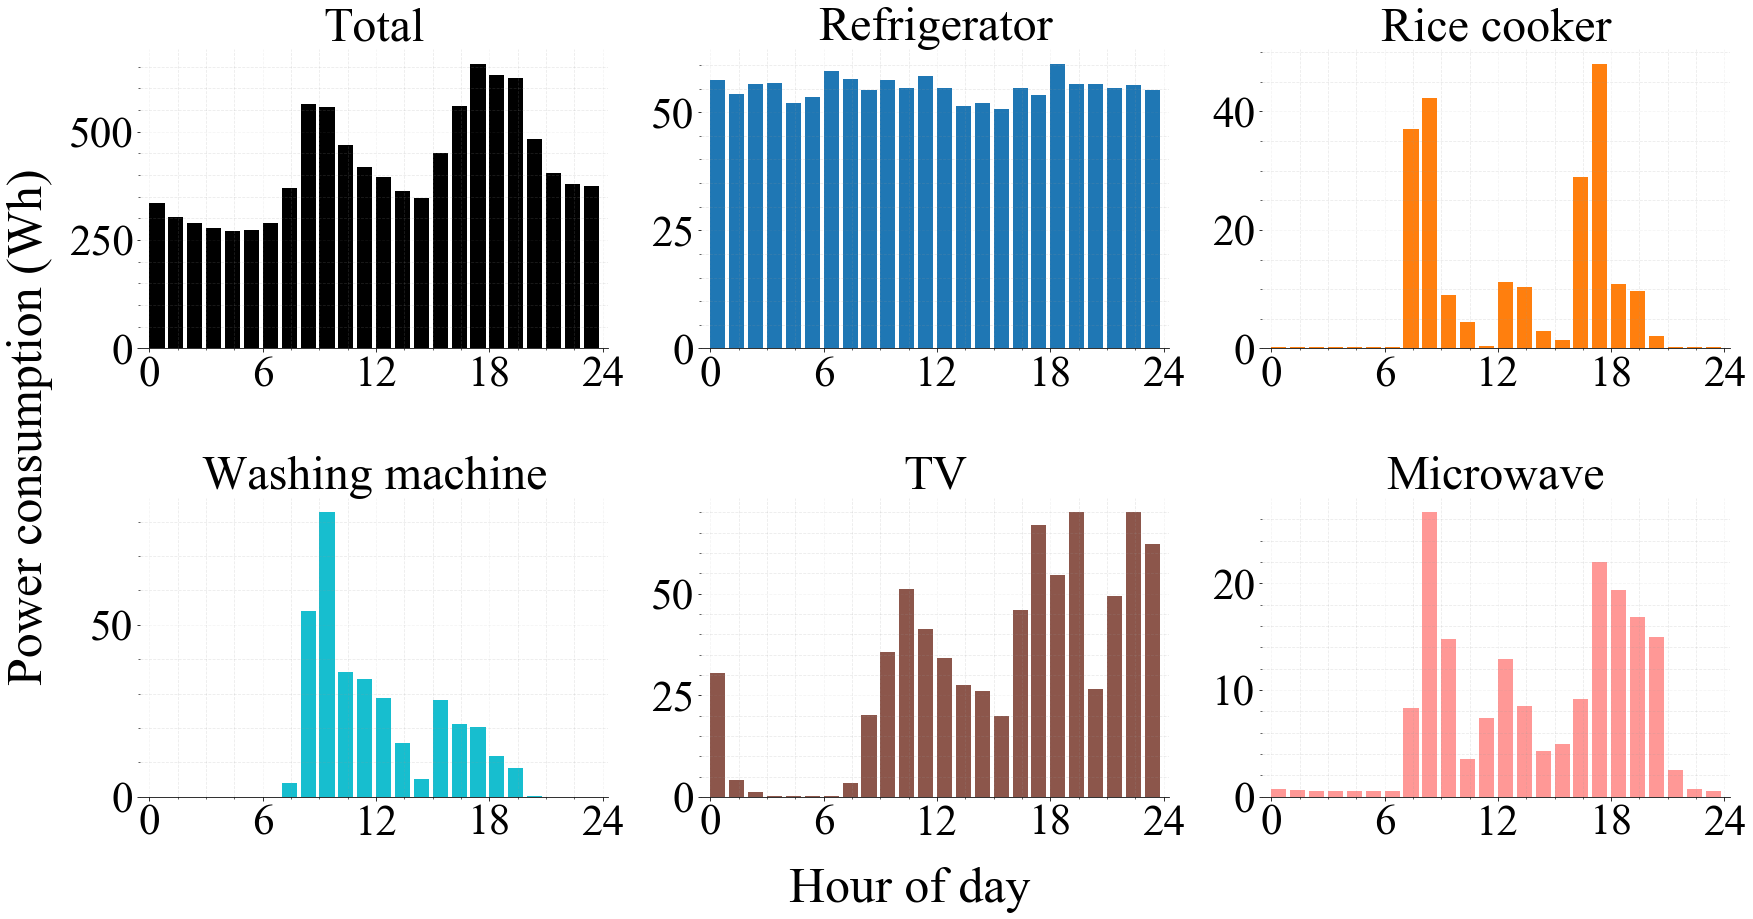

In [2]:
plot_path = '../plots/'
app_name_lst = ['total', 'fridge', 'rice-cooker', 'washing-machine', 'TV', 'microwave']
overall_fontsize = 48

fig, ax = plt.subplots(2, 3, figsize=(fig_width*3.2, fig_height*2.5))
fig.subplots_adjust(hspace=0.5)
for i, app_name in enumerate(app_name_lst):
    app_data = select_app_data(df_hour, app_name)
    print(i, app_name, int((i)/3)+1,(i)%3+1)
    row = int((i)/3)
    col = (i)%3
    app_color = get_app_color(app_name)
    ax[row, col].bar(list(range(0,24)), app_data['active_power']['mean'].get_values(), align='edge',\
                    color=app_color)
    ax[row, col].set_title(get_pretty_name(app_name), fontsize=overall_fontsize)
    ax[row, col].tick_params(labelsize=overall_fontsize)
    ax[row, col].margins(x=0.02, tight = True)
    ax[row, col].spines['top'].set_visible(False)
    ax[row, col].spines['left'].set_visible(False)
    ax[row, col].spines['right'].set_visible(False)
    ax[row, col].grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
    ax[row, col].minorticks_on()
    ax[row, col].grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax[row, col].xaxis.set_ticks([0,6,12,18,24])
    ax[row, col].xaxis.set_tick_params(labelsize=overall_fontsize*0.9)
    ax[row, col].yaxis.set_tick_params(labelsize=overall_fontsize*0.9)
        
fig.text(0.5, 0.02, 'Hour of day', ha='center', fontsize=overall_fontsize+2)
fig.text(0.06, 0.5, 'Power consumption (Wh)', va='center', rotation='vertical',  fontsize=overall_fontsize+2)
fig.show()
fig.savefig('../plots/usage_hourly_distribution_00.pdf', bbox_inches='tight', format='pdf', dpi=1000)